# Problem Set 2 - Question 4 Answers

##### André Filipe Silva - 26005
##### João Seixo - 40510
##### Márcia Serra - 41221

Before the first question we must import the required data.

In [1]:
library(readxl)
data= read_xls("C:\\Users\\andre\\OneDrive\\Documentos\\Economia Nova SBE\\1st year\\2º Semestre\\Macroeconometrics\\Assignments\\PSet2\\ps_2_data.xls")

Warning message:
"package 'readxl' was built under R version 3.6.3"

## Exercise 4a

In [2]:
data=data[,-1]
datats=as.ts(data)

We will use the ADF test for stationarity, which has the following test hypothesis:

$H_0$: Non - Stationarity<br>
$H_1$: Stationarity

In [4]:
library(tseries)

Stationarity test for the unemployment rate series:

In [5]:
adf.test(datats[,1])


	Augmented Dickey-Fuller Test

data:  datats[, 1]
Dickey-Fuller = -3.1415, Lag order = 8, p-value = 0.09801
alternative hypothesis: stationary


For a 5% significance level, unemployment rate is not stationary. But it would be stationary if we considered a 10% significance level.

Stationarity test for the Average Hourly Earnings series:

In [6]:
adf.test(datats[,2])


	Augmented Dickey-Fuller Test

data:  datats[, 2]
Dickey-Fuller = -0.94687, Lag order = 8, p-value = 0.9473
alternative hypothesis: stationary


For a 5% significance level, average hourly earnings are not stationary.

## Exercise 4b

In [9]:
library(vars)
var1=VAR(datats, lag.max= 24, ic="AIC")
var1


VAR Estimation Results:

Estimated coefficients for equation unrate: 
Call:
unrate = unrate.l1 + wage.l1 + unrate.l2 + wage.l2 + unrate.l3 + wage.l3 + unrate.l4 + wage.l4 + unrate.l5 + wage.l5 + unrate.l6 + wage.l6 + unrate.l7 + wage.l7 + unrate.l8 + wage.l8 + unrate.l9 + wage.l9 + unrate.l10 + wage.l10 + const 

   unrate.l1      wage.l1    unrate.l2      wage.l2    unrate.l3      wage.l3 
 0.997715160 -0.161609462  0.145098129  0.087422518 -0.028651446  0.445054900 
   unrate.l4      wage.l4    unrate.l5      wage.l5    unrate.l6      wage.l6 
 0.038682675 -0.256108281 -0.087279762 -0.050692008 -0.006612815  0.606033550 
   unrate.l7      wage.l7    unrate.l8      wage.l8    unrate.l9      wage.l9 
-0.064995910 -0.096719950 -0.003116134 -0.624989969  0.007338920  0.386963642 
  unrate.l10     wage.l10        const 
-0.008657744 -0.338593054  0.039556636 


Estimated coefficients for equation wage: 
Call:
wage = unrate.l1 + wage.l1 + unrate.l2 + wage.l2 + unrate.l3 + wage.l3 + unrate

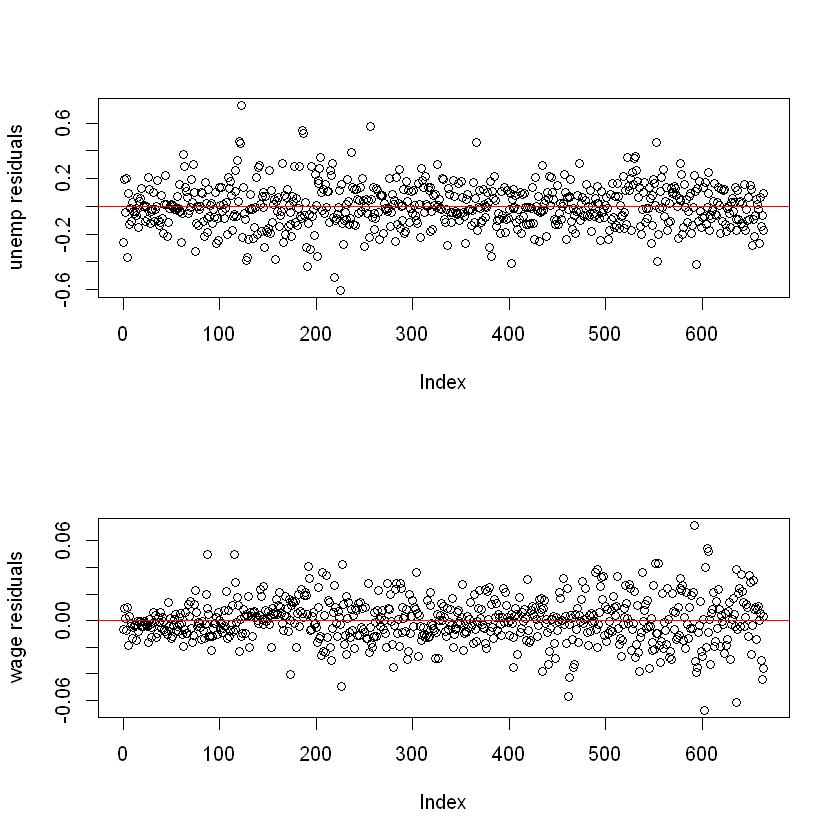

In [24]:
par(mfrow=c(2,1))
plot(residuals(var1)[,1], ylab="unemp residuals")
abline(h=0,col="red")
plot(residuals(var1)[,2], ylab="wage residuals")
abline(h=0, col="red")

Upon graphical inspection of the residuals, they do look stationary. However, we will proceed with more formal steps to conclude it.  We will perform a formal Augmented Dickey-Fuller test to be sure the residuals are stationary.

Using the ADF test, the hypothesis are:

$H_0$: Unit Root (non-stationarity)<br>
$H_1$: Stationarity

In [59]:
adf.test((residuals(var1)[,1]))

Warning message in adf.test((residuals(var1)[, 1])):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  (residuals(var1)[, 1])
Dickey-Fuller = -8.1468, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


In [61]:
adf.test(residuals(var1)[,2])

Warning message in adf.test(residuals(var1)[, 2]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  residuals(var1)[, 2]
Dickey-Fuller = -8.9356, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


For both residual series, we reject the null hypothesis.<br>
So, we can conclude that both residuals series are stationary.

## Exercise 4c

Note: As there was no indication of the number of "steps-ahead" to compute, we computed as far ahead as we could for maximum reliability and result interpretation.

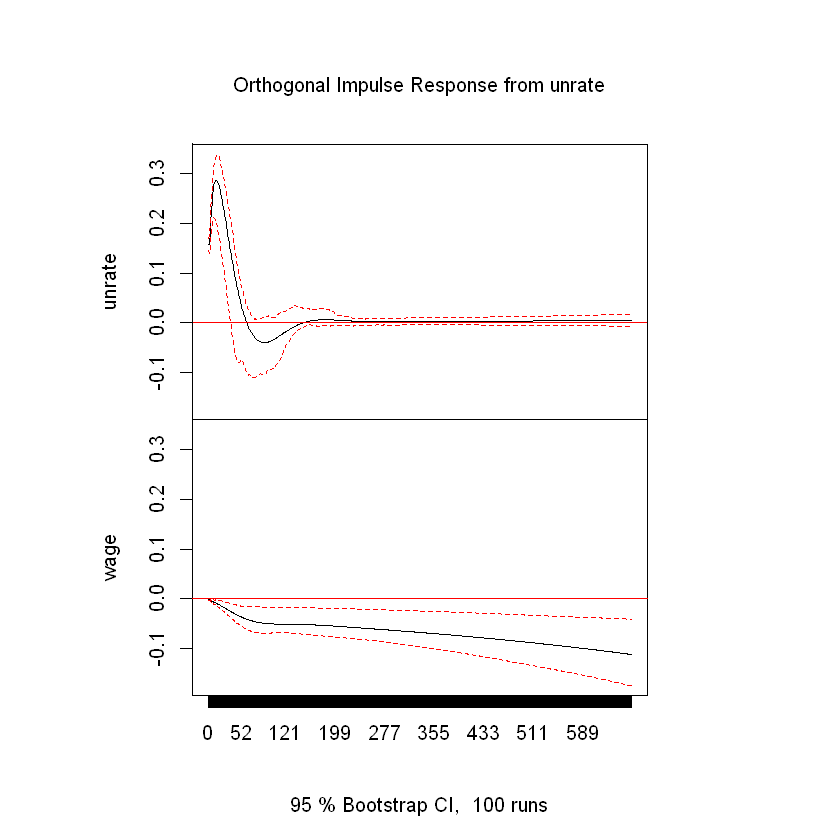

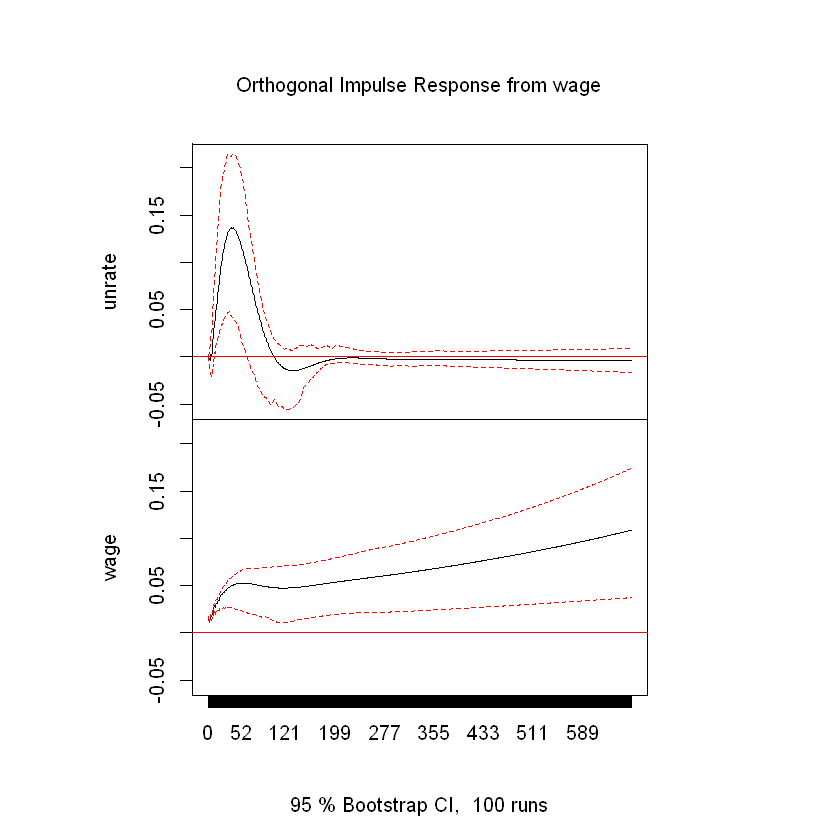

In [43]:
irf1=irf(var1, n.ahead=664, ci=0.95, runs=100)
plot(irf1)

Transforming the data for interpretation:

In [44]:
data4c=data
data4c[,2]=(log(data4c[,2]))*100
data4cts=as.ts(data4c)

In [45]:
var2=VAR(data4cts, lag.max =24, ic="AIC")
irf2=irf(var2, n.ahead=664, ci=0.95,runs=100)

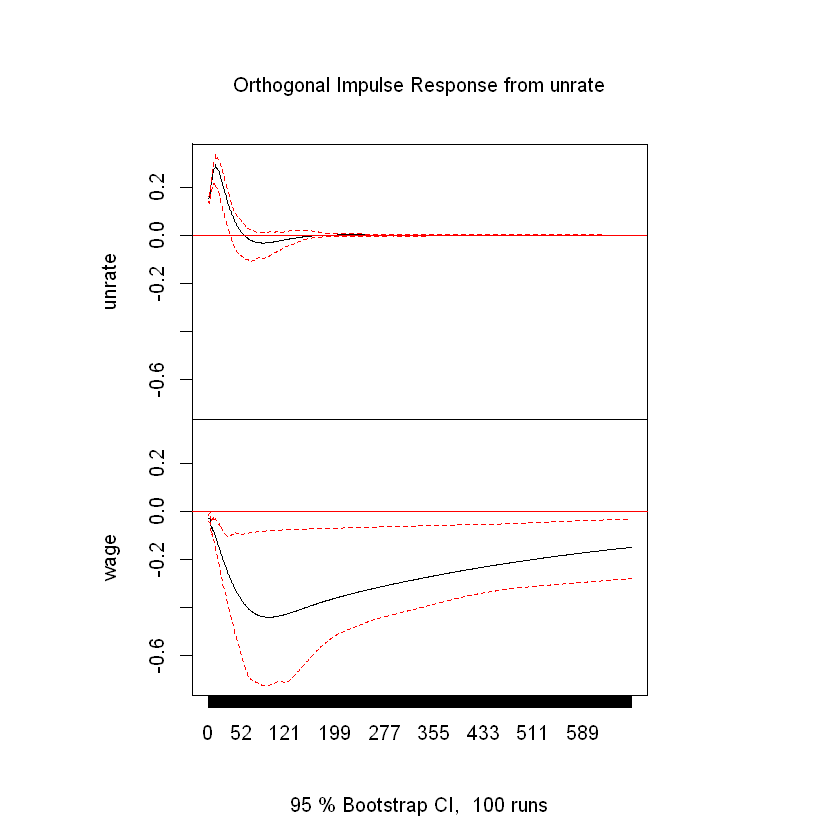

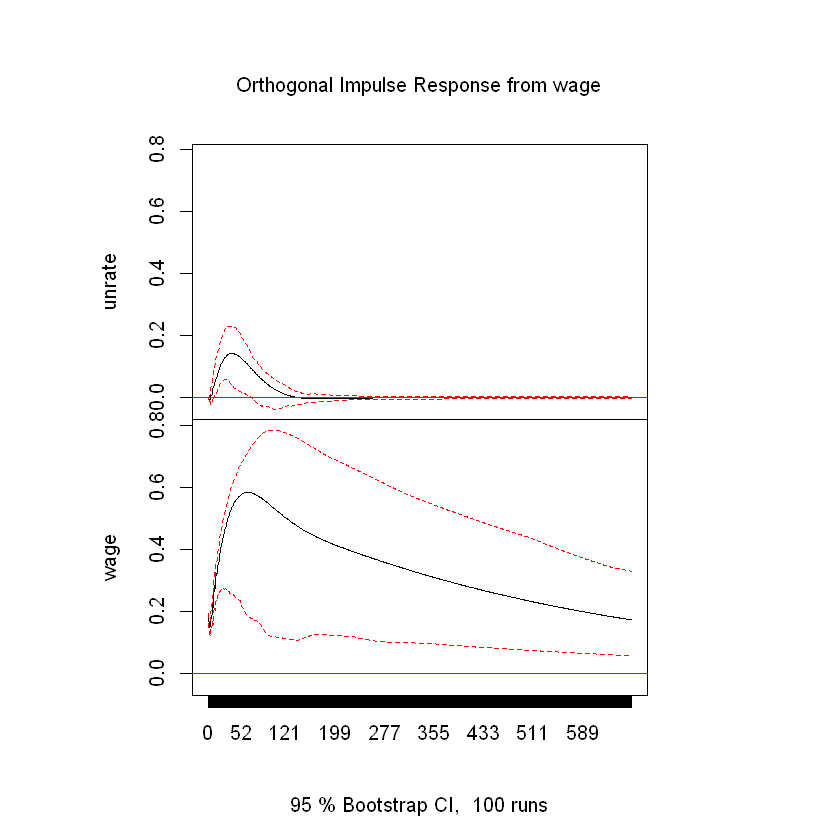

In [46]:
plot(irf2)

In [52]:
irf2$irf$unrate[1:5,]
min(irf2$irf$unrate[,2])

unrate,wage
0.1565424,-0.02922724
0.1574580,-0.02810773
0.1807575,-0.02523782
0.1973153,-0.04707346
0.2222352,-0.07091138


[1] -0.4412827

When there is a shock to unemployment rate of around 15.65%, wages decrease by around 29% contemporaneously. The effect seems to be long-lasting, peaking at around -44% but then stabilizing at around -20%.

In [53]:
irf2$irf$wage[1:5,]

unrate,wage
0.000000000,0.1824096
-0.009385314,0.1482168
-0.007577133,0.1499522
0.005680792,0.1810602
0.006307142,0.1780844


Contemporaneously, shocks to wages do not affect unemployment rate: this is by construction, as required for the identification of our VAR model.

Starting from one step-ahead, however, an increase of around 14.82% in wage leads to increases in the unemployment rate, not very large in magnitude but persistent (we say persistent because it lasts for around 122 steps, meaning around 10 years).

## Exercise 4d

In [54]:
data4d= data[,c(2,1)]
data4dts=as.ts(data4d)
var3=VAR(data4dts, lag.max =24, ic="AIC")

irf3=irf(var3, n.ahead=664, ci=0.95, runs=100)

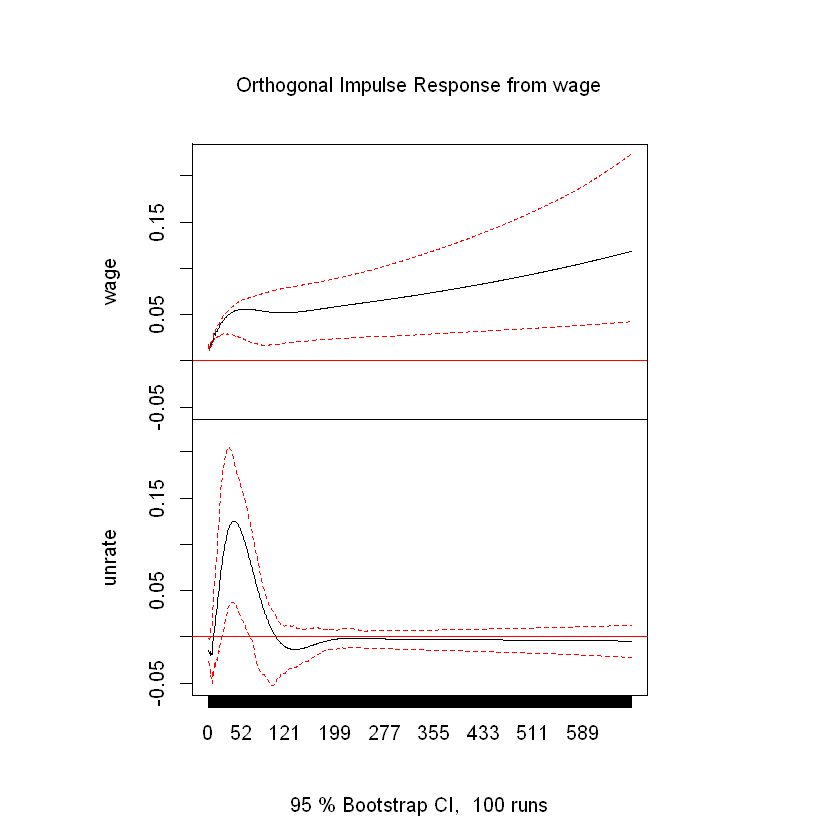

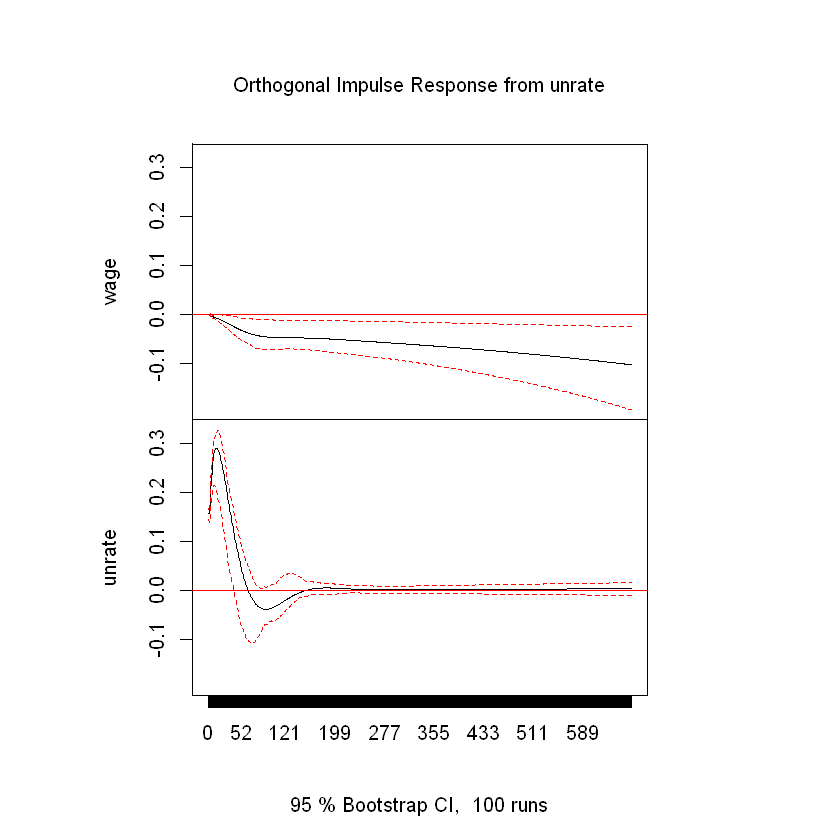

In [55]:
plot(irf3)

Formally testing for the stationarity of the residuals, once again the hypothesis for the ADF test are:

$H_0$: Unit Root (Non-Stationarity)<br>
$H_1$: Stationarity

In [62]:
adf.test(residuals(var3)[,1])

Warning message in adf.test(residuals(var3)[, 1]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  residuals(var3)[, 1]
Dickey-Fuller = -8.9356, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


In [63]:
adf.test(residuals(var3)[,2])

Warning message in adf.test(residuals(var3)[, 2]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  residuals(var3)[, 2]
Dickey-Fuller = -8.1468, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


The p-values for the ADF tests lead us to reject the null hypothesis, for a significance level of 5%. As such, we conclude for stationarity of the residuals of our VAR. Our conclusions do not change from the ones found in b).

## Exercise 4e

In [67]:
fevd1=fevd(var3, n.ahead=664, ci=0.95)
fevd1$wage[1:10,]

wage,unrate
1.0000000,0.0000000000
0.9991588,0.0008412325
0.9992551,0.0007449185
0.9967160,0.0032839603
0.9880792,0.0119208417
0.9841039,0.0158961144
0.9794308,0.0205691967
0.9721070,0.0278929711
0.9727292,0.0272707543
0.9719857,0.0280142518


We see that at impact, unemployment rate shocks have zero relevance in explaining movements in wages - which matches our identification restriction.<br>
However, as time progresses, unemployment rate shocks are increasingly more relevant to explain moves in wages. We can see that 8 years ahead (96 steps-ahead) it explains about 28.19% of the movement in wages, and about 40% at 30 years ahead (360 steps). It gets increasingly more important in explaining wages as time goes by.<br>
Note: This can be found through RStudio but Jupyter limits the number of steps-ahead that can be displayed. 

In [68]:
fevd1$unrate[1:10,]

wage,unrate
0.008410719,0.9915893
0.010108832,0.9898912
0.010869312,0.9891307
0.009354733,0.9906453
0.008621467,0.9913785
0.007991624,0.9920084
0.006426549,0.9935735
0.005197962,0.9948020
0.004313632,0.9956864
0.003848229,0.9961518


 When we decompose the proportions for movements in the unemployment rate sequence, we see that right from impact, wage shocks explains some of the change in unemployment rate. It keeps increasing but as time progresses it stabilizes at about 22.5% in terms of relative importance.

## Exercise 4f

Granger causality testing requires the variables of the VARs to be stationary. We need thus to have stationary time series.<br>
In Question 4a) we saw that neither of the two variables are stationary at a 5% level. Since we have monthly data, it is likely that first differencing alone will not solve our problem, but let's try.

In [69]:
firstdiff=diff(data4dts)

In [70]:
adf.test(firstdiff[,2])

Warning message in adf.test(firstdiff[, 2]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  firstdiff[, 2]
Dickey-Fuller = -5.8298, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


First-differencing unemployment rate makes it stationary.

In [71]:
adf.test(firstdiff[,1])


	Augmented Dickey-Fuller Test

data:  firstdiff[, 1]
Dickey-Fuller = -3.3243, Lag order = 8, p-value = 0.06649
alternative hypothesis: stationary


However, first-differencing wages does not make it stationary yet.<br>
We will try second-differencing for both variables.

In [72]:
seconddiff=diff(firstdiff)

In [73]:
adf.test(seconddiff[,1])

Warning message in adf.test(seconddiff[, 1]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  seconddiff[, 1]
Dickey-Fuller = -13.533, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


The wages series is now stationary as well. We can proceed towards Granger-causality testing.

In [74]:
var4=VAR(seconddiff, lag.max = 20, ic="AIC")

__The question: Does unemployment rate Granger-cause wages?__

In [75]:
causality(var4, cause=c("unrate"))

$Granger

	Granger causality H0: unrate do not Granger-cause wage

data:  VAR object var4
F-Test = 2.7757, df1 = 15, df2 = 1252, p-value = 0.0003013


$Instant

	H0: No instantaneous causality between: unrate and wage

data:  VAR object var4
Chi-squared = 3.4959, df = 1, p-value = 0.06152



From the F-Test p-value, we can reject the null hypothesis, and therefore conclude that unemployment rate Granger-causes wages.